<a href="https://colab.research.google.com/github/helene-rocca/Python-For-Finance/blob/main/Python_for_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PYTHON FOR FINANCE INDIVIDUAL PROJECT**

**TOPIC : Capital Asset Pricing Model (CAPM)**

**Step 1 : Import Libraries**

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns


In [ ]:
pip install seaborn


**Step 2 : Import Data of 15 stocks**

In [ ]:
pip install yfinance


*Stocks chosen*

In [ ]:
tickers = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'TSLA', 'JPM', 'GS', 'IBM', 'NFLX', 'CSCO', 'BA', 'DIS', 'WMT', 'KO', 'XOM']


*Studied Period*

In [ ]:
start_date = '2015-01-01'
end_date = '2023-01-01'

*Dataframe creation*

In [ ]:
df_stocks = pd.DataFrame()

*Data extraction from Yahoo Finance*

In [ ]:
for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    #We select the column "Adj Close"
    df_stocks[ticker] = stock_data['Adj Close']

print(df_stocks.head(15))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

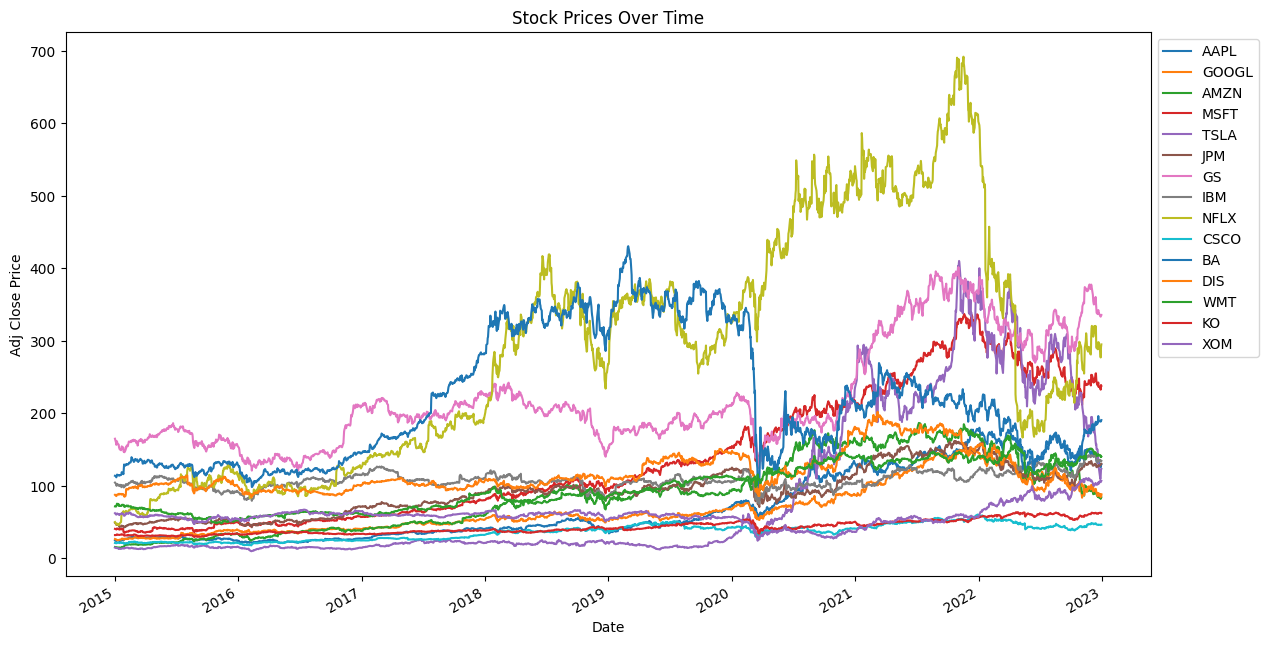

In [ ]:
df_stocks.plot(figsize=(14, 8))
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


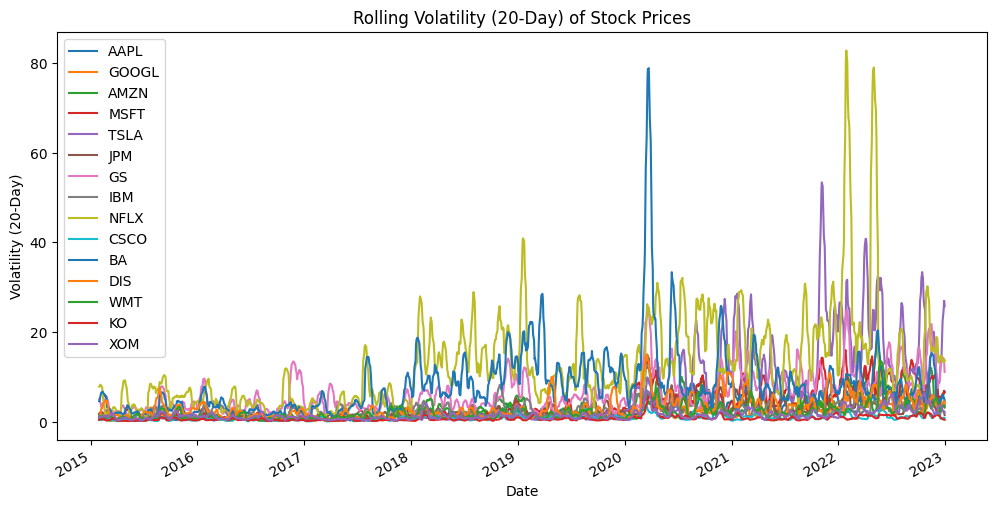

In [ ]:
plt.figure(figsize=(12,6))

for ticker in tickers:
    df_stocks[ticker].rolling(window=20).std().plot(label=ticker)

plt.title('Rolling Volatility (20-Day) of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Volatility (20-Day)')
plt.legend(loc='upper left')
plt.show()


**Step 3: CAPM Model Construction**

*Stocks mean returns*

In [ ]:
df = pd.DataFrame()
stocks_returns = df_stocks.pct_change()
print(stocks_returns)

                AAPL     GOOGL      AMZN      MSFT      TSLA       JPM  \
Date                                                                     
2015-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2015-01-05 -0.028172 -0.019054 -0.020517 -0.009196 -0.042041 -0.031045   
2015-01-06  0.000094 -0.024679 -0.022833 -0.014677  0.005664 -0.025929   
2015-01-07  0.014022 -0.002941  0.010600  0.012706 -0.001562  0.001526   
2015-01-08  0.038423  0.003484  0.006836  0.029418 -0.001564  0.022346   
...              ...       ...       ...       ...       ...       ...   
2022-12-23 -0.002798  0.016750  0.017425  0.002267 -0.017551  0.004745   
2022-12-27 -0.013879 -0.020621 -0.025924 -0.007414 -0.114089  0.003504   
2022-12-28 -0.030685 -0.015677 -0.014692 -0.010255  0.033089  0.005465   
2022-12-29  0.028324  0.028249  0.028844  0.027630  0.080827  0.005738   
2022-12-30  0.002469 -0.002487 -0.002138 -0.004937  0.011164  0.006606   

                  GS       IBM      N

In [ ]:
# To get the percentages
mean_returns = stocks_returns.mean()*100
print(mean_returns)

AAPL     0.100499
GOOGL    0.075632
AMZN     0.106089
MSFT     0.103722
TSLA     0.169615
JPM      0.064817
GS       0.052864
IBM      0.024688
NFLX     0.130620
CSCO     0.052988
BA       0.061193
DIS      0.015513
WMT      0.043159
KO       0.040251
XOM      0.043555
dtype: float64


*Covariance matrix*

In [ ]:
cov_matrix = df_stocks.cov()
print(cov_matrix)

              AAPL        GOOGL         AMZN          MSFT          TSLA  \
AAPL   2423.531766  1583.542619  2170.676520   4284.809502   5110.914555   
GOOGL  1583.542619  1129.078023  1507.005034   2911.864294   3406.372481   
AMZN   2170.676520  1507.005034  2496.215867   4127.250485   4367.566434   
MSFT   4284.809502  2911.864294  4127.250485   7893.742341   8889.020646   
TSLA   5110.914555  3406.372481  4367.566434   8889.020646  11784.820407   
JPM    1315.931143   970.274199  1387.671781   2518.642622   2659.637093   
GS     3062.794259  2183.869008  2604.510798   5439.931349   6735.812046   
IBM     276.413870   188.627468   159.317624    456.930787    569.765307   
NFLX   5543.597289  4108.489911  7466.837301  11268.268207  10824.797210   
CSCO    414.126073   306.035650   466.371489    821.555712    793.661536   
BA     -126.493747   286.097198  1077.187290    636.325523  -1400.624417   
DIS     859.652078   658.488622  1085.894357   1700.127500   1851.928127   
WMT    1422.

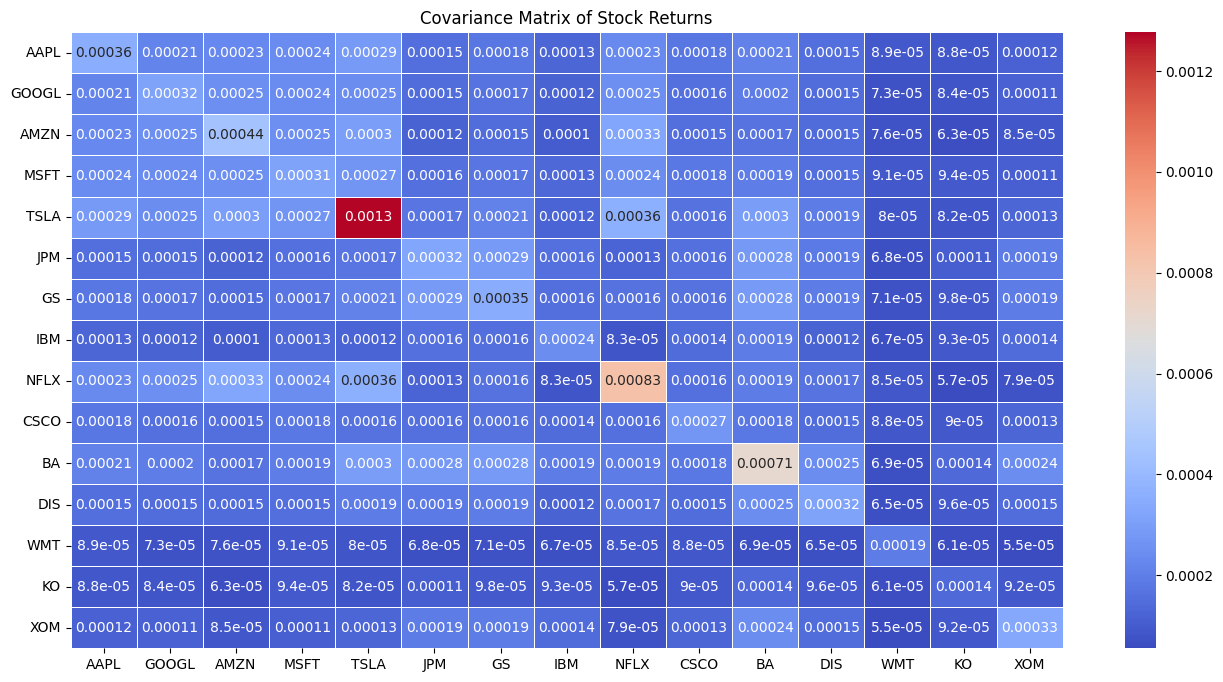

In [ ]:
covariance_matrix = stocks_returns.cov()

plt.figure(figsize=(16, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Covariance Matrix of Stock Returns')
plt.show()

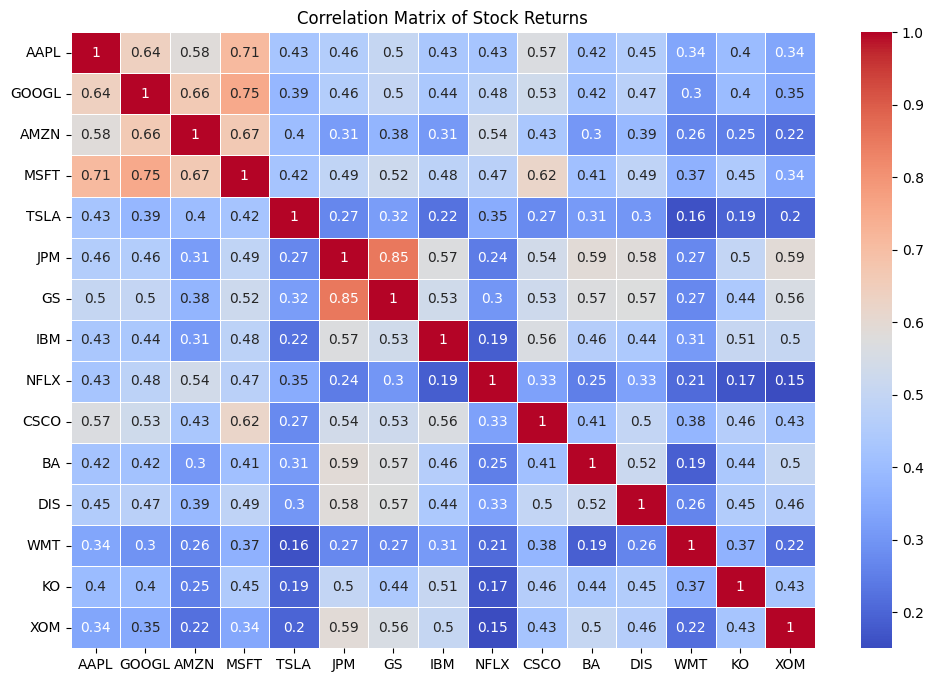

In [ ]:
correlation_matrix = stocks_returns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stock Returns')
plt.show()




*Market data choice : as stocks are all US equity, the adequate market data is the S&P 500, with the ticker "GSPC"*

In [ ]:
market_data = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


*Covariance computation between stock returns and the market*

In [ ]:
cov_with_market = df_stocks.apply(lambda x: np.cov(x, market_data)[0, 1])
print(cov_with_market)

AAPL      38583.671282
GOOGL     26822.878461
AMZN      37461.155482
MSFT      70902.651884
TSLA      80473.391184
JPM       24309.136835
GS        52644.165247
IBM        4826.655209
NFLX     104023.814817
CSCO       7766.386455
BA        13103.144813
DIS       16551.183202
WMT       23796.561903
KO         6643.279495
XOM        2202.132116
dtype: float64


*Betas of the stocks*

In [ ]:
betas = cov_with_market / market_data.var()
print(betas)

AAPL     0.058483
GOOGL    0.040657
AMZN     0.056782
MSFT     0.107470
TSLA     0.121977
JPM      0.036846
GS       0.079795
IBM      0.007316
NFLX     0.157673
CSCO     0.011772
BA       0.019861
DIS      0.025087
WMT      0.036069
KO       0.010070
XOM      0.003338
dtype: float64


**Step 4: CAPM Model results**

*Risk-free rate Choice*

In [ ]:
# I calculated betas and chose a U.S. Treasury bill data as the risk-free rate (IRX)
risk_free_data = yf.download('^IRX', start=start_date, end=end_date)['Adj Close'] / 100
risk_free_rate = risk_free_data.mean()
print(risk_free_rate)


[*********************100%%**********************]  1 of 1 completed
0.009485596421088609


*Market returns*

In [ ]:
market_return = market_data.pct_change()
print(market_return)

Date
2015-01-02         NaN
2015-01-05   -0.018278
2015-01-06   -0.008893
2015-01-07    0.011630
2015-01-08    0.017888
                ...   
2022-12-23    0.005868
2022-12-27   -0.004050
2022-12-28   -0.012021
2022-12-29    0.017461
2022-12-30   -0.002541
Name: Adj Close, Length: 2014, dtype: float64


In [98]:
#To get market returns in percentage
average_market_return = market_return.mean() * 100
print(average_market_return)

0.03807055585910639


*Expected returns with the CAPM model*

In [ ]:
expected_returns = risk_free_rate + betas * (average_market_return - risk_free_rate)

#Displaying the results:
for i, ticker in enumerate(tickers):
    print(f"Stock: {ticker}")
    print(f"Beta: {betas[i]:.4f}")
    print(f"Expected Return (CAPM): {expected_returns[i]:.4f}\n")

Stock: AAPL
Beta: 0.0585
Expected Return (CAPM): 0.0112

Stock: GOOGL
Beta: 0.0407
Expected Return (CAPM): 0.0106

Stock: AMZN
Beta: 0.0568
Expected Return (CAPM): 0.0111

Stock: MSFT
Beta: 0.1075
Expected Return (CAPM): 0.0126

Stock: TSLA
Beta: 0.1220
Expected Return (CAPM): 0.0130

Stock: JPM
Beta: 0.0368
Expected Return (CAPM): 0.0105

Stock: GS
Beta: 0.0798
Expected Return (CAPM): 0.0118

Stock: IBM
Beta: 0.0073
Expected Return (CAPM): 0.0097

Stock: NFLX
Beta: 0.1577
Expected Return (CAPM): 0.0140

Stock: CSCO
Beta: 0.0118
Expected Return (CAPM): 0.0098

Stock: BA
Beta: 0.0199
Expected Return (CAPM): 0.0101

Stock: DIS
Beta: 0.0251
Expected Return (CAPM): 0.0102

Stock: WMT
Beta: 0.0361
Expected Return (CAPM): 0.0105

Stock: KO
Beta: 0.0101
Expected Return (CAPM): 0.0098

Stock: XOM
Beta: 0.0033
Expected Return (CAPM): 0.0096



*Some graphs to visualize*

Bar Plot of Expected Returns:

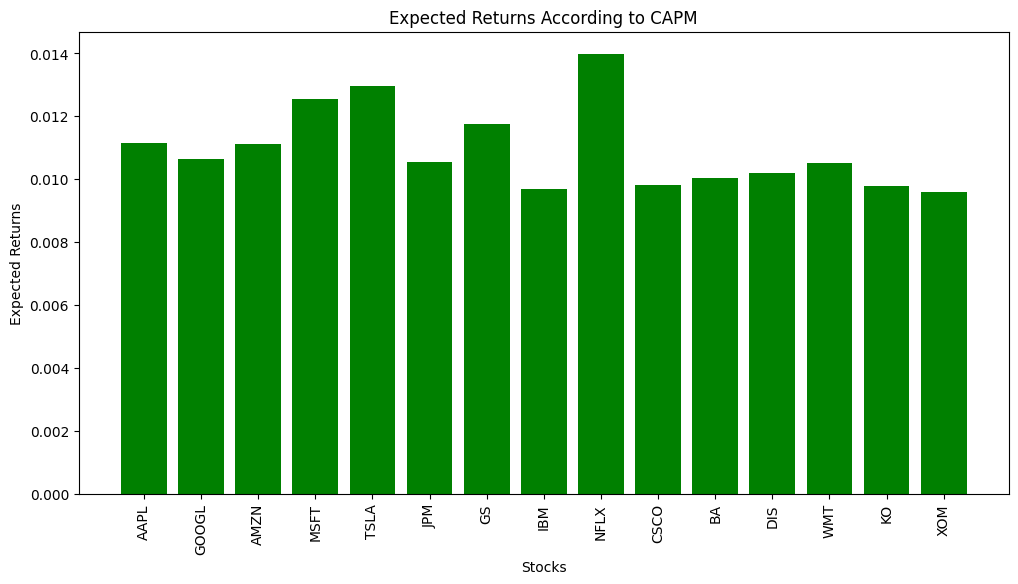

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(expected_returns)), expected_returns, color='green')
plt.xticks(range(len(expected_returns)), tickers, rotation='vertical')
plt.title('Expected Returns According to CAPM')
plt.xlabel('Stocks')
plt.ylabel('Expected Returns')
plt.show()

Line Plot of the Security Market Line (SML)

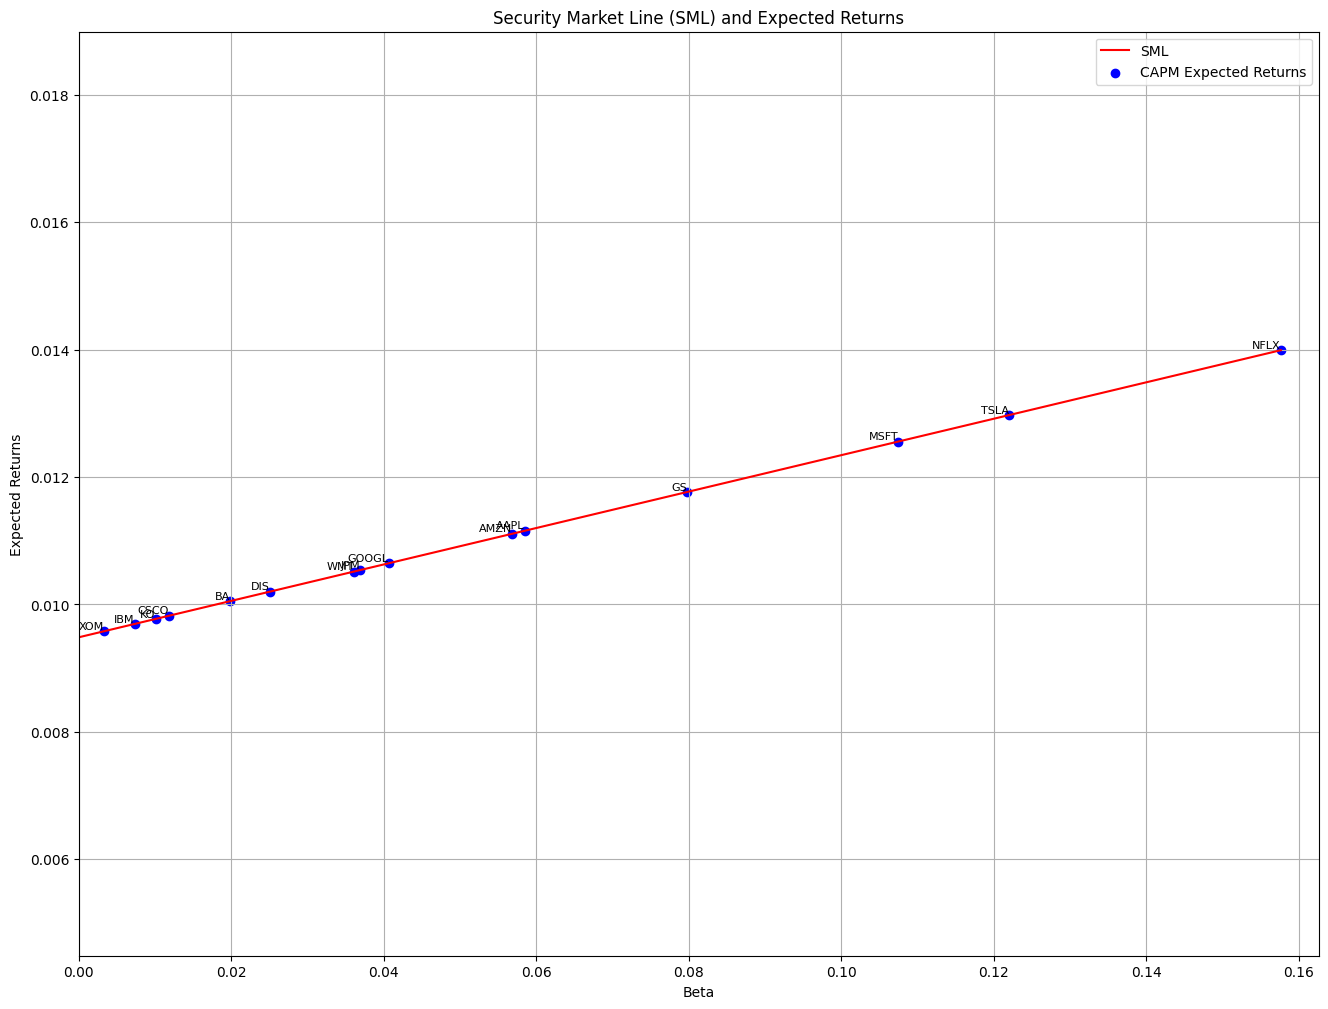

In [ ]:
betas_range = np.linspace(0, max(betas), 100)
sml_values = risk_free_rate + betas_range * (average_market_return - risk_free_rate)

plt.figure(figsize=(16, 12))
plt.plot(betas_range, sml_values, color='red', label='SML')
plt.scatter(betas, expected_returns, color='blue', label='CAPM Expected Returns')

#For better visualization
plt.xlim(0, max(betas) + 0.005)
plt.ylim(risk_free_rate - 0.005, max(expected_returns) + 0.005)
for i, ticker in enumerate(tickers):
    y_coord = expected_returns[i] + 0.02 if i % 2 == 0 else expected_returns[i] - 0.02
    plt.annotate(ticker, (betas[i], expected_returns[i]), fontsize=8, ha='right', va='bottom')

plt.title('Security Market Line (SML) and Expected Returns')
plt.xlabel('Beta')
plt.ylabel('Expected Returns')
plt.legend()
plt.grid(True)
plt.show()